In [276]:
# accesing spoitpy using API
!pip3 install spotipy --upgrade
!pip3 install pandas


from spotipy.oauth2 import SpotifyClientCredentials
import spotipy.util as util
import spotipy
import pandas as pd

# Set up authentication
auth_manager = SpotifyClientCredentials(
    client_id='c1dbe7ab23974fcd989fcfbbbf58a1be',
    client_secret='2a35292756814772b5ce8358f368d0a5')

sp = spotipy.Spotify(auth_manager=auth_manager)

git add spotify3copy.ipynb

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [277]:
songs23 = sp.search(q = 'year:2023', type = 'track', limit=50)
songs22 = sp.search(q = 'year:2022', type = 'track', limit=50)
songs21 = sp.search(q = 'year:2021', type = 'track', limit=50)
songs20 = sp.search(q = 'year:2020', type = 'track', limit=50)

tracks23 = []
for track in songs23['tracks']['items']:
    track_data = {
        'id': track['id'],
        'name': track['name'],
        'artist': track['artists'][0]['name']
    }
    audio_features = sp.audio_features([track['id']])[0]  # Fetch audio features
    for key in ['danceability', 'energy',
                'loudness', 'speechiness',
                'acousticness', 'instrumentalness',
                'liveness', 'valence', 'tempo']:
        track_data[key] = audio_features.get(key)
    tracks23.append(track_data)

# Convert to DataFrame
data = pd.DataFrame(tracks23)

# Select specific columns to display
columns_to_display = ['name', 'artist', 'danceability', 'energy', 'acousticness', 'valence']

# Display the first 10 rows with the selected columns, sorted by 'danceability' in descending order
data[columns_to_display].sort_values(by='danceability', ascending=False).head(10)



,name,artist,danceability,energy,acousticness,valence
33,Private Landing (feat. Justin Bieber & Future),Don Toliver,0.843,0.669,0.0846,0.435
5,Search & Rescue,Drake,0.817,0.440,0.0603,0.544
15,Favorite Song,Toosii,0.816,0.367,0.3140,0.413
36,Search & Rescue,Drake,0.813,0.430,0.0658,0.534
12,La Bebe - Remix,Yng Lvcas,0.812,0.479,0.2130,0.559
18,OMG,NewJeans,0.804,0.771,0.3570,0.739
10,PRC,Peso Pluma,0.784,0.826,0.0965,0.893
34,Cupid - Twin Ver.,FIFTY FIFTY,0.783,0.592,0.4350,0.726
19,"Shakira: Bzrp Music Sessions, Vol. 53",Bizarrap,0.778,0.632,0.2740,0.498
20,In Ha Mood,Ice Spice,0.768,0.740,0.6960,0.532


In [278]:
def get_tracks(query, limit=50):
    search_results = sp.search(q=query, type='track', limit=limit)

    tracks = []
    for track in search_results['tracks']['items']:
        track_data = {
            'id': track['id'],
            'name': track['name'],
            'artist': track['artists'][0]['name'],
            'album': track['album']['name'],
            'release_date': track['album']['release_date']
        }
        audio_features = sp.audio_features([track['id']])[0]
        for key in ['danceability', 'energy',
                    'loudness', 'speechiness',
                    'acousticness', 'instrumentalness',
                    'liveness', 'valence', 'tempo']:
            track_data[key] = audio_features.get(key)
        tracks.append(track_data)

    return pd.DataFrame(tracks)


def get_track_features(track, spotify):
    """
    Retrieves the audio features for a given Spotify track.

    Parameters:
        track (dict): The Spotify track object.
        spotify (spotipy.Spotify): An authenticated Spotipy client object.

    Returns:
        dict: A dictionary containing the audio features and additional details of the track.
    """
    track_id = track['id']
    features = spotify.audio_features(track_id)

    if features and features[0]:  # Check if features exist and if the first element is not None
        features = features[0]
        features = {
            'id': features['id'],
            'name': track['name'],  # Add the track name
            'artist': track['artists'][0]['name'],  # Add the artist name
            'danceability': features['danceability'],
            'energy': features['energy'],
            'loudness': features['loudness'],
            'speechiness': features['speechiness'],
            'acousticness': features['acousticness'],
            'instrumentalness': features['instrumentalness'],
            'liveness': features['liveness'],
            'valence': features['valence'],
            'tempo': features['tempo']
        }
        return features
    else:
        return None


In [279]:
rap_tracks = get_tracks("genre:rap", limit=50)
hiphop_tracks = get_tracks("genre:hip hop", limit=50)
edm_tracks = get_tracks("genre:edm", limit=50)

# Add a 'genre' column to each DataFrame
rap_tracks['genre'] = 'rap'
hiphop_tracks['genre'] = 'hip hop'
edm_tracks['genre'] = 'edm'

# Combine the fetched tracks into a single DataFrame
tracks_df = pd.concat([rap_tracks, hiphop_tracks, edm_tracks], ignore_index=True)

# One-hot encoding the 'genre' column
genre_dummies = pd.get_dummies(tracks_df['genre'], prefix='genre')
tracks_df = pd.concat([tracks_df, genre_dummies], axis=1)




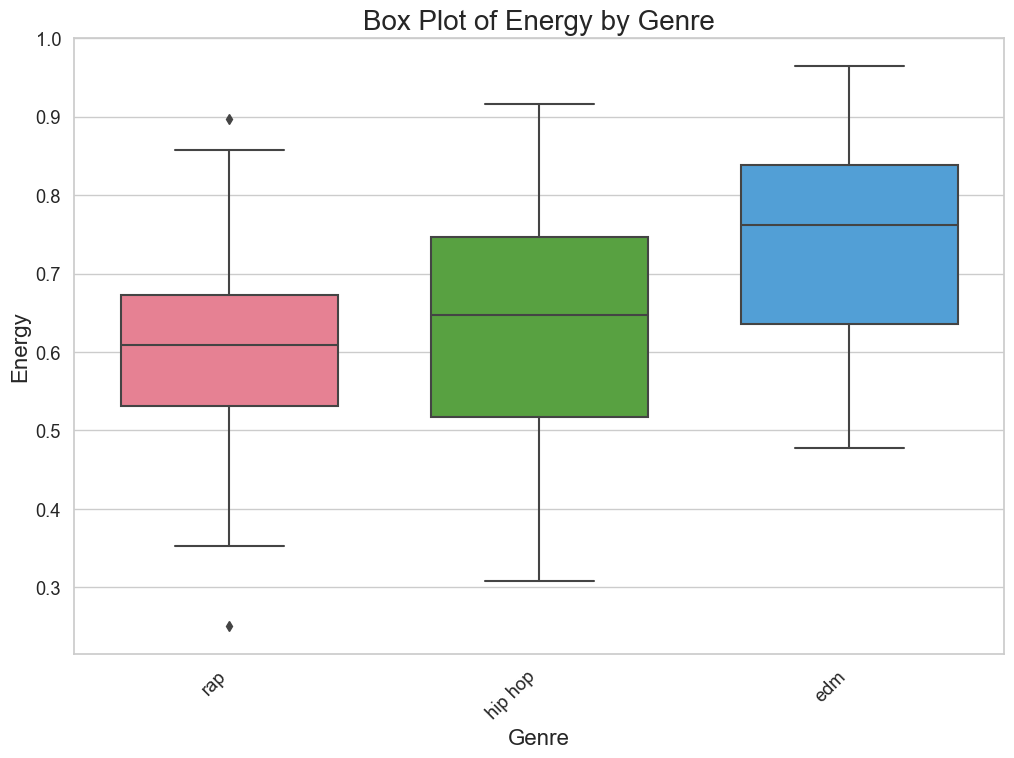

In [280]:

# Create a box plot of the 'energy' feature for each genre
# Customize the box plot
plt.figure(figsize=(12, 8))  # Adjust the figure size
sns.set(font_scale=1.2)  # Adjust the font size
sns.set_style("whitegrid")  # Set the background to white with gridlines
palette = sns.color_palette("husl", n_colors=len(tracks_df['genre'].unique()))  # Define a custom color palette
boxplot = sns.boxplot(x='genre', y='energy', data=tracks_df, palette=palette, width=0.7)  # Customize the width of the boxes
boxplot.set_xticklabels(boxplot.get_xticklabels(), rotation=45, horizontalalignment='right')  # Rotate x-axis labels
plt.title('Box Plot of Energy by Genre', fontsize=20)  # Add a title
plt.xlabel('Genre', fontsize=16)  # Add x-axis label
plt.ylabel('Energy', fontsize=16)  # Add y-axis label

plt.show()


In [281]:
!pip3 install matplotlib
!pip3 install seaborn

import matplotlib.pyplot as plt
import seaborn as sns

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


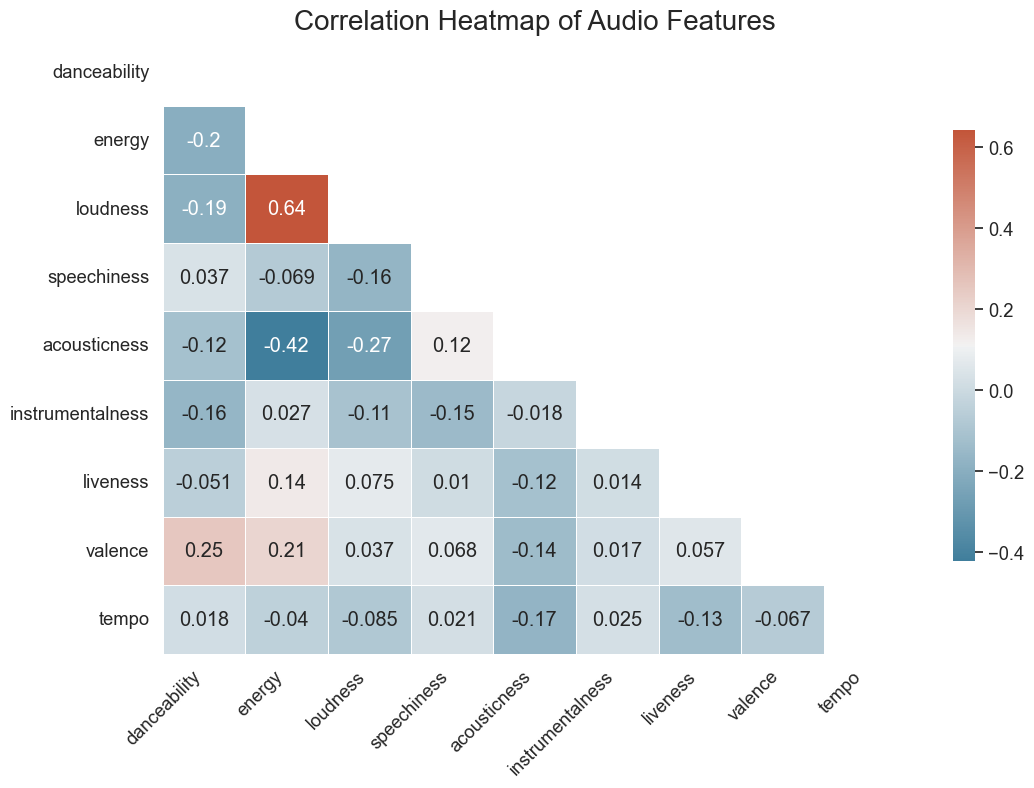

In [282]:


# Define numeric features
numeric_features = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

# Calculate the correlation matrix
correlation_matrix = tracks_df[numeric_features].corr()

# Customize the heatmap
plt.figure(figsize=(12, 8))  # Adjust the figure size
sns.set(font_scale=1.2)  # Adjust the font size
sns.set_style("white")  # Set the background to white
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))  # Remove the upper triangular part
cmap = sns.diverging_palette(230, 20, as_cmap=True)  # Define a custom color map
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap=cmap, mask=mask, linewidths=.5, cbar_kws={'shrink': 0.7})
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, horizontalalignment='right')  # Rotate x-axis labels
plt.title('Correlation Heatmap of Audio Features', fontsize=20)  # Add a title

plt.show()


/Users/abel/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  fig.canvas.print_figure(bytes_io, **kw)


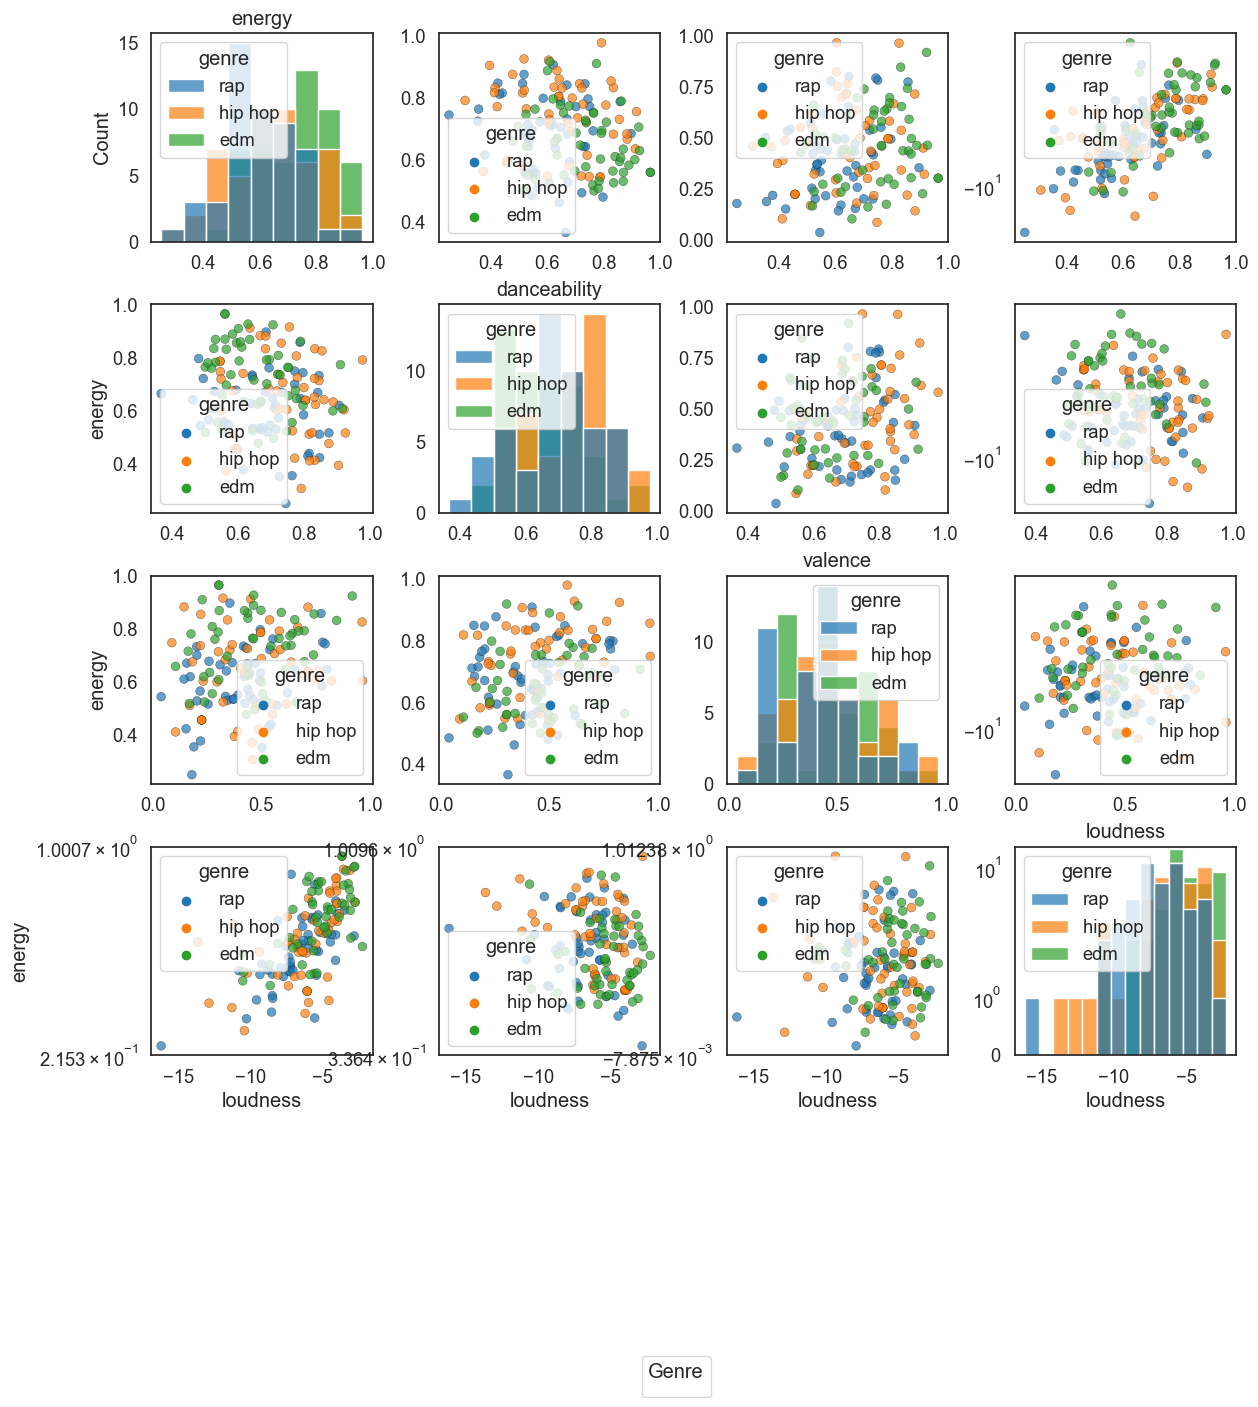

In [283]:

# Select a subset of features
selected_features = ['energy', 'danceability', 'valence', 'loudness']

# Create a scatter plot matrix using small multiples
n_features = len(selected_features)
fig, axes = plt.subplots(n_features, n_features, figsize=(14, 14))
palette = sns.color_palette("tab10", n_colors=len(tracks_df['genre'].unique()))

# Iterate through the combinations of features
for i, feature1 in enumerate(selected_features):
    for j, feature2 in enumerate(selected_features):
        if i != j:
            sns.scatterplot(ax=axes[i, j], data=tracks_df, x=feature1, y=feature2, hue='genre', palette=palette, alpha=0.7, edgecolor='k', linewidth=0.3, s=40)
        else:
            sns.histplot(ax=axes[i, j], data=tracks_df, x=feature1, hue='genre', palette=palette, alpha=0.7)

        if i != n_features - 1:
            axes[i, j].set_xlabel('')
        if j != 0:
            axes[i, j].set_ylabel('')
        if feature1 == 'loudness' or feature2 == 'loudness':
            axes[i, j].set_yscale('symlog')

# Add titles to the diagonal plots
for i, feature in enumerate(selected_features):
    axes[i, i].set_title(feature)

# Add a legend
handles, labels = axes[-1, -1].get_legend_handles_labels()
fig.legend(handles[1:], labels[1:], loc='lower center', ncol=len(tracks_df['genre'].unique()), bbox_to_anchor=(0.5, -0.10), title='Genre', fontsize='small', title_fontsize='medium')
fig.subplots_adjust(bottom=0.15, hspace=0.3, wspace=0.3)

plt.show()


In [284]:
#Authentication - without user
client_credentials_manager = SpotifyClientCredentials(client_id='c1dbe7ab23974fcd989fcfbbbf58a1be', client_secret='2a35292756814772b5ce8358f368d0a5')
spotify = spotipy.Spotify(client_credentials_manager = client_credentials_manager)

In [285]:
user = 'spotify'
playlists = spotify.user_playlists(user)

for playlist in playlists['items']:
    print(playlist['name'])
    print('  total tracks', playlist['tracks']['total'])

Today's Top Hits
  total tracks 50
RapCaviar
  total tracks 50
Hot Country
  total tracks 50
Viva Latino
  total tracks 50
New Music Friday
  total tracks 100
Peaceful Piano
  total tracks 302
Are & Be
  total tracks 51
Rock Classics
  total tracks 200
mint
  total tracks 76
Rock This
  total tracks 50
New Music Friday
  total tracks 100
just hits
  total tracks 93
All Out 2000s
  total tracks 150
All Out 90s
  total tracks 150
All Out 80s
  total tracks 150
All Out 70s
  total tracks 150
All Out 60s
  total tracks 150
All Out 50s
  total tracks 150
Soft Pop Hits
  total tracks 100
Signed XOXO
  total tracks 100
Most Necessary
  total tracks 101
Gold School
  total tracks 50
Get Turnt
  total tracks 100
B.A.E.
  total tracks 50
African Heat
  total tracks 50
Dancehall Official
  total tracks 68
Westside Story
  total tracks 55
Power Workout
  total tracks 50
No Cap
  total tracks 50
State of Mind
  total tracks 106
Alternative Hip-Hop
  total tracks 100
Workout Twerkout
  total tracks 

In [286]:
# Get all the featured playlists
featured_playlists = spotify.featured_playlists(limit=10)

# Loop through the featured playlists and print their names and IDs
for playlist in featured_playlists['playlists']['items']:
    print(f"{playlist['name']} ({playlist['id']})")

# Get all the genre-based playlists
genres = spotify.categories(limit=10)['categories']['items']
for genre in genres:
    print(genre['name'])
    playlists = spotify.category_playlists(category_id=genre['id'], limit=5)['playlists']
    if playlists is not None and 'items' in playlists:
        for playlist in playlists['items']:
            if playlist is not None:  # Add this line to check for None values
                print(f"\t{playlist['name']} ({playlist['id']})")
            else:
                print("\tPlaylist is None")
    else:
        print("\tNo playlists found for this genre.")


POLLEN (37i9dQZF1DWWBHeXOYZf74)
Signed XOXO (37i9dQZF1DX2A29LI7xHn1)
Vanguard (37i9dQZF1DWSfMe9z89s9B)
Jazz Vibes (37i9dQZF1DX0SM0LYsmbMT)
Pop Country (37i9dQZF1DXadasIcsfbqh)
Channel-X (37i9dQZF1DX4y8h9WqDPAE)
Global X (37i9dQZF1DWUxHPh2rEiHr)
Jazztronica (37i9dQZF1DX55dNU0PWnO5)
Rocktronic (37i9dQZF1DWTfrr8pte1rT)
Calming Acoustic (37i9dQZF1DXaImRpG7HXqp)
Top Lists
	Today's Top Hits (37i9dQZF1DXcBWIGoYBM5M)
	RapCaviar (37i9dQZF1DX0XUsuxWHRQd)
	Rock This (37i9dQZF1DXcF6B6QPhFDv)
	mint (37i9dQZF1DX4dyzvuaRJ0n)
	Hot Country (37i9dQZF1DX1lVhptIYRda)
Hip-Hop
	RapCaviar (37i9dQZF1DX0XUsuxWHRQd)
	Feelin' Myself (37i9dQZF1DX6GwdWRQMQpq)
	Most Necessary (37i9dQZF1DX2RxBh64BHjQ)
	Get Turnt (37i9dQZF1DWY4xHQp97fN6)
	Gold School (37i9dQZF1DWVA1Gq4XHa6U)
Pop
	Today's Top Hits (37i9dQZF1DXcBWIGoYBM5M)
	Hot Hits USA (37i9dQZF1DX0kbJZpiYdZl)
	Pop Rising (37i9dQZF1DWUa8ZRTfalHk)
	Pop Frequency (37i9dQZF1DX1UnoGuyf388)
	Just Good Music (37i9dQZF1DX0b1hHYQtJjp)
Country
	Hot Country (37i9dQZF1DX1lVhptIY

In [287]:
!pip3 install scikit-learn
import pandas as pd
import numpy as np
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer

Defaulting to user installation because normal site-packages is not writeable


In [288]:
def get_playlist_tracks(playlist_id, spotify):
    """
    Retrieves the tracks for a given Spotify playlist ID.

    Parameters:
        playlist_id (str): the ID of the Spotify playlist
        spotify (spotipy.Spotify): an authenticated Spotipy client object

    Returns:
        list: a list of track objects for the playlist
    """
    results = spotify.playlist_tracks(playlist_id)
    tracks = results['items']
    while results['next']:
        results = spotify.next(results)
        tracks.extend(results['items'])
    return tracks


# Define a list of all possible genre keys
all_genres = ['genre_rap', 'genre_hip hop', 'genre_edm']

def get_track_features(track, spotify):
    """
    Retrieves the audio features for a given Spotify track.

    Parameters:
        track (dict): The Spotify track object.
        spotify (spotipy.Spotify): An authenticated Spotipy client object.

    Returns:
        dict: A dictionary containing the audio features and additional details of the track.
    """
    track_id = track['id']
    features = spotify.audio_features(track_id)

    if features and features[0]:
        features = features[0]
        artist_id = track['artists'][0]['id']
        artist = spotify.artist(artist_id)
        genres = artist['genres']
        
        # One-hot encode the genres if the list is not empty
        genre_dummies = pd.get_dummies(genres, prefix='genre') if genres else pd.DataFrame()
        
        # Initialize all genre keys with a value of 0
        track_features = {genre: 0 for genre in all_genres}
        
        # Update the track_features dictionary with audio features
        track_features.update({
            'id': features['id'],
            'name': track['name'],
            'artist': track['artists'][0]['name'],
            'danceability': features['danceability'],
            'energy': features['energy'],
            'loudness': features['loudness'],
            'speechiness': features['speechiness'],
            'acousticness': features['acousticness'],
            'instrumentalness': features['instrumentalness'],
            'liveness': features['liveness'],
            'valence': features['valence'],
            'tempo': features['tempo']
        })
        
        # Update the track_features dictionary with genre features if available
        if not genre_dummies.empty:
            track_features.update(genre_dummies.to_dict(orient='records')[0])
        
        return track_features
    else:
        return None


In [289]:
# Collect songs from playlists and extract features
playlist_ids = ["37i9dQZF1DX0XUsuxWHRQd",   ##
                "37i9dQZF1DXcBWIGoYBM5M",   ##Today's Top Hits
                "37i9dQZEVXbLRQDuF5jeBp",   ##
                "37i9dQZF1DX1lVhptIYRda",
                "37i9dQZF1DXcF6B6QPhFDv",
                "37i9dQZF1DX4SBhb3fqCJd",
                "37i9dQZF1DX4dyzvuaRJ0n",
                "37i9dQZF1DXdwmD5Q7Gxah",
                "37i9dQZF1DX6GwdWRQMQpq",
                "37i9dQZF1DX0MLFaUdXnjA",]
songs = []

for playlist_id in playlist_ids:
    playlist_tracks = get_playlist_tracks(playlist_id, spotify)
    for track in playlist_tracks:
        track_features = get_track_features(track['track'], spotify)  # Pass the whole track object

        if track_features:
            songs.append(track_features)


# Create a DataFrame with the collected data
df = pd.DataFrame(songs)

# Combine the playlist data and your collected data
combined_df = pd.concat([df, tracks_df], ignore_index=True)


# Select the audio features you want to use for building the recommendation model
audio_features = [
    'danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
    'instrumentalness', 'liveness', 'valence', 'tempo', 'genre_rap', 'genre_hip hop', 'genre_edm'
]

# Create an imputer to fill missing values with the mean value of each column
imputer = SimpleImputer(strategy='mean')

# Use the imputer to fill in any missing values in the selected audio features
imputed_features = imputer.fit_transform(combined_df[audio_features])

# Scale the features to bring them to a common scale
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(imputed_features)

# Train a kNN model
knn = NearestNeighbors(n_neighbors=5, metric='cosine')
knn.fit(scaled_features)



NearestNeighbors(metric='cosine')

In [290]:
def recommend_songs(input_song_ids, knn_model, combined_df, scaler, num_recommendations=10):
    input_features = []
    for song_id in input_song_ids:
        if song_id in combined_df['id'].values:
            input_features.append(scaled_features[combined_df[combined_df['id'] == song_id].index[0]])
        else:
            track = spotify.track(song_id)
            track_features = get_track_features(track, spotify)
            if track_features:
                feature_values = [track_features[feature] for feature in audio_features]
                input_features.append(scaler.transform([feature_values])[0])
            else:
                print(f"Could not fetch features for song ID {song_id}.")
                continue

    distances_list = []
    indices_list = []

    for input_feature in input_features:
        distances, indices = knn_model.kneighbors(input_feature.reshape(1, -1))
        distances_list.extend(distances[0])
        indices_list.extend(indices[0])

    combined = list(zip(indices_list, distances_list))
    combined = sorted(combined, key=lambda x: x[1])

    recommended_song_ids = []
    for i in range(len(combined)):
        song_id = combined_df.iloc[combined[i][0]]['id']
        # Check if the song ID is already in the list of recommendations or is one of the input songs
        if song_id not in recommended_song_ids and song_id not in input_song_ids:
            recommended_song_ids.append((song_id, combined[i][1]))
            # Stop adding recommendations once the desired number is reached
            if len(recommended_song_ids) >= num_recommendations:
                break

    return recommended_song_ids







In [291]:


def get_artist_songs(artist_name, spotify):
    """
    Retrieves all songs of a given artist.
    
    Parameters:
        artist_name (str): The name of the artist.
        spotify (spotipy.Spotify): An authenticated Spotipy client object.
    
    Returns:
        list: A list of dictionaries containing the song name and ID, sorted alphabetically.
    """
    # Search for the artist
    results = spotify.search(q=f"artist:{artist_name}", type="artist", limit=1)
    if not results['artists']['items']:
        print(f"No artist found with the name {artist_name}.")
        return []

    artist = results['artists']['items'][0]
    artist_id = artist['id']

    # Get all albums of the artist
    albums = []
    results = spotify.artist_albums(artist_id, album_type='album')
    albums.extend(results['items'])
    while results['next']:
        results = spotify.next(results)
        albums.extend(results['items'])

    # Get all songs from the albums
    songs = []
    for album in albums:
        album_tracks = spotify.album_tracks(album['id'])
        for track in album_tracks['items']:
            song = {
                'name': track['name'],
                'id': track['id']
            }
            songs.append(song)

    # Sort the songs alphabetically based on the 'name' key
    songs = sorted(songs, key=lambda x: x['name'].lower())

    return songs


def print_song_details(song_id_score_tuples, df):
    for item in song_id_score_tuples:
        if isinstance(item, tuple):
            song_id, score = item
            song = df[df['id'] == song_id].iloc[0]
            print(f"Song ID: {song['id']}\nSong Name: {song['name']}\nArtist: {song['artist']}\nScore: {score}\n")
        else:
            song = df[df['id'] == item].iloc[0]
            print(f"Song ID: {song['id']}\nSong Name: {song['name']}\nArtist: {song['artist']}\n")



artist_name = "tyler the creator"
artist_songs = get_artist_songs(artist_name, spotify)

print(f"Songs by {artist_name}:")
for song in artist_songs:
    print(f"{song['name']} (ID: {song['id']})")



Songs by tyler the creator:
2SEATER (feat. Aaron Shaw, Samantha Nelson & Austin Feinstein) (ID: 6Xw3iWrQKgArwlRhVuU9CK)
2SEATER (feat. Aaron Shaw, Samantha Nelson & Austin Feinstein) (ID: 5LUJ8X9S6lJOeUwJkWqCeX)
2SEATER - Instrumental (ID: 2svpV0Ja1LtGq6eE7Pysu9)
48 (ID: 3PvfHvnuV2wUcWVOFWXnzY)
48 (ID: 2wK7y55bzry7tUDmDqYaz7)
48 (ID: 3e1eAGw2Icto28DqCqtNSG)
48 - Instrumental (ID: 31bO3sXBncrrSl5stbzGKN)
911 / Mr. Lonely (feat. Frank Ocean & Steve Lacy) (ID: 4bEcoz1OcfMgUbp2ft8ieQ)
A BOY IS A GUN* (ID: 1nXZnTALNXiPlvXotqHm66)
Analog (ID: 1PY2MhM4Ih2VfEHeSMTiOE)
Analog (ID: 3xFXkeyBtnysOlrQwYan5z)
Analog (ID: 4DJ63obgThdFzKRgRrUbkG)
Analog (ID: 2sfFLzeZj86kKaQngyyYd5)
Answer (ID: 6rqj2zeKhLy3exkuFi6mSz)
Answer (ID: 2qkhKEikKcL5FgYZ7iiY52)
Answer - Instrumental (ID: 2XXRfOIeQ9oIkSAqgW0kNr)
ARE WE STILL FRIENDS? (ID: 5TxRUOsGeWeRl3xOML59Ai)
AU79 (ID: 33nigbRuOi8OIF7tYpID6k)
AU79 (ID: 7nfjw4GlYu6kGVkf19yzFe)
AU79 (ID: 48VvSmLKQv4bKkcjtHlVZS)
AU79 (ID: 4dFi17Rws1xmlOlp4wPj3z)
Awkward (ID: 6c

In [292]:
# Example usage
input_song_ids = ['000TJlEJQ3nafsm1hBWpoj','3WQlJpaUUbGtUqAskvGA7c']  # Replace these with your chosen song IDs
recommended_songs_knn = recommend_songs(input_song_ids, knn, combined_df, scaler, num_recommendations=10)
print("Recommended songs (kNN):")
print_song_details(recommended_songs_knn, combined_df)

Recommended songs (kNN):
Song ID: 0pHrAAe6sSVDeUeNe5IesY
Song Name: MOTTO
Artist: NF
Score: 0.00640808793500991

Song ID: 1Vg6GjFzuM97oYOkj0tD7u
Song Name: Big Poppa
Artist: The Notorious B.I.G.
Score: 0.018270197499878016

Song ID: 4iN1JQAVQLO3aaqXxBeQte
Song Name: Take Care
Artist: Young Thug
Score: 0.019031754037805992

Song ID: 7f1UEGMBMuXfLBP5XANfrW
Song Name: The Hop
Artist: A Tribe Called Quest
Score: 0.02577340116807636

Song ID: 5zC21mZRV5rCxKgz2MOzm1
Song Name: Friend of Mine
Artist: The Notorious B.I.G.
Score: 0.027756202139079145

Song ID: 3EG9FJ0ToLfgnc1IG2Z1wz
Song Name: SWEET / I THOUGHT YOU WANTED TO DANCE (feat. Brent Faiyaz & Fana Hues)
Artist: Tyler, The Creator
Score: 0.028391643707422753

Song ID: 4iN1JQAVQLO3aaqXxBeQte
Song Name: Take Care
Artist: Young Thug
Score: 0.028570186133384246

Song ID: 0vjeOZ3Ft5jvAi9SBFJm1j
Song Name: Superhero (Heroes & Villains) [with Future & Chris Brown]
Artist: Metro Boomin
Score: 0.03125807338963882

Song ID: 0vjeOZ3Ft5jvAi9SBFJm1